In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
df.shape

(42000, 785)

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

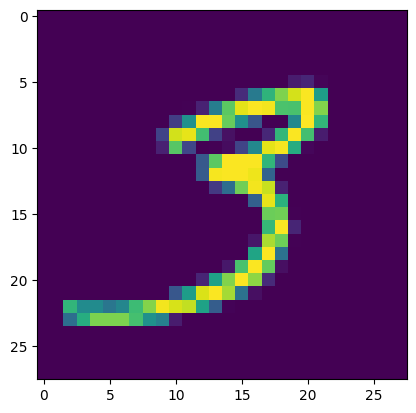

In [7]:
plt.imshow(df.iloc[13000,1:].values.reshape(28,28))

In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [10]:
X_train.shape

(33600, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier


In [12]:
knn = KNeighborsClassifier()



In [13]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [14]:
knn_pred = knn.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, knn_pred)

0.9648809523809524

Doing PCA---- Principal Component Analysis

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 700)

In [20]:
X_train.shape

(33600, 784)

In [21]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [22]:
X_train_trf.shape

(33600, 700)

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [25]:
y_pred = knn.predict(X_test_trf)

In [26]:
accuracy_score(y_pred, y_test)

0.9391666666666667

In [34]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

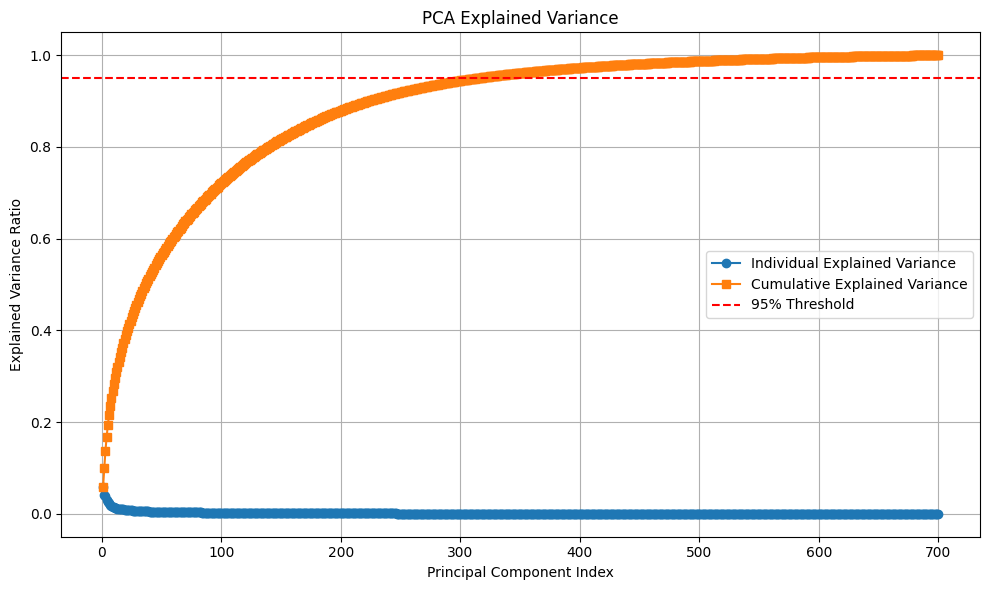

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Around 300 component were needed to reach 95% threshold

In [36]:
pca = PCA(n_components = 300)

In [40]:
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)

In [42]:
X_train2.shape

(33600, 300)

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train2, y_train)
y_pred = knn.predict(X_test2)

In [44]:
accuracy_score(y_pred, y_test)

0.9466666666666667

#Almost Similar accuracy achieved with less than half of the actual number of coloumn